# 다중 회귀분석 실습

python의 scikit-learn 패키지를 이용해 다중 회귀분석을 직접 실행해보자.

### 데이터 불러오기

Scikit-learn에서는 데이터 분석 연습을 위한 몇 가지의 toy dataset을 제공하고 있다. 그 중 이번 시간에 사용할 데이터셋은 diabetes dataset이다. 

Diabetes dataset은 당뇨병 환자들의 1년간 당뇨병 진행 변화에 대한 데이터이다. 독립 변수는 나이와 성별 등 환자의 정보이며, 예측해야 하는 종속 변수는 당뇨병의 진행 정도이다. 자세한 사항은 [이곳](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)에서 확인할 수 있다.

결측치가 없고 데이터 정규화(normalization)도 완료되어 있어, 제공된 그대로 분석에 사용하면 된다.

In [18]:
from sklearn import datasets

In [19]:
# 데이터 불러오기
data = datasets.load_diabetes()

In [20]:
# 데이터 확인
for k, v in data.items():
  print(k, ': ', v)

data :  [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
target :  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150

보다 편한 사용을 위해, 독립 변수를 x에 저장하고 종속 변수를 y에 저장하자.

In [21]:
# 데이터 저장 및 확인
x = data['data']
y = data['target']

print(x.shape, y.shape)

(442, 10) (442,)


### 데이터 분할하기

수업 시간에 배웠다시피, 적절한 모델을 학습시키기 위해서는 주어진 데이터를 training / validation / test 로 나누는 과정이 필수적이다. 아래처럼  scikit-learn에서 제공하는 [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 함수를 이용하면 편리하게 데이터를 나눌 수 있다.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(264, 10) (89, 10) (89, 10)


### 모델 학습하기

Training data를 이용해 회귀분석 모델을 학습해 보자. 먼저 아래와 같이 필요한 패키지를 import 한다.

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

Scikit-learn에서 제공하는 [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression) 모델에 대해 살펴보자. 이 객체를 선언할 때 필요한 주요 parameter는 다음과 같다.

1.   fit_intercept: 상수항을 사용할 것인지에 대한 여부. True 일 때 상수항 사용. default=True
2.   normalize: 정규화를 수행할 것인지에 대한 여부. True 일 때 정규화 수행. default=False

이번 실습의 경우는 두 parameter 모두 default 값을 사용하면 된다.


이제 본격적으로 회귀분석 모델을 학습해 보자. Scikit-learn 모델의 학습을 위해 수행해야 할 작업은  

1.   모델 객체 생성
2.   데이터를 이용한 학습

이 전부이다!

In [25]:
# 회귀분석 객체 생성
mlr = LinearRegression()

# 회귀분석 모델 학습
mlr.fit(x_train, y_train)

LinearRegression()

추정한 모델의 회귀계수를 확인해 보자. 가장 영향력 있는 변수는?

In [26]:
# 회귀계수 확인
print(mlr.intercept_)
print(mlr.coef_)

147.87388534119617
[ -39.57865915 -236.60328634  489.97259328  352.8678163  -873.03276134
  430.03354622  208.4341436   306.03221956  746.84762599  116.37588728]


추정한 모델의 설명력을 확인해 보자. 수업 시간에 배운 결정계수 R-square를 계산하려면 우선 training data에 대한 예측값을 알아야 한다.

In [27]:
# training data 예측값
pred_train = mlr.predict(x_train)

이제 scikit-learn에서 제공하는 r2_score 함수를 이용해 R-square 값을 계산해 보자.

In [28]:
# training data에 대한 R-square 계산
from sklearn.metrics import r2_score
print(r2_score(y_train, pred_train))

0.5353262888595558


Validation data, test data의 R-sqaure 값도 같은 방법으로 계산해 보자.

In [29]:
# validation data에 대한 R-square 계산
pred_val = mlr.predict(x_val)
print(r2_score(y_val, pred_val))

0.4934085901313141


In [30]:
# test data에 대한 R-square 계산
pred_test = mlr.predict(x_test)
print(r2_score(y_test, pred_test))

0.4432722010710277


### 모델 선택하기

수업 시간에 배운 단계적 회귀분석법 중 하나인 전진 선택법을 구현해 보자.

전진 선택법은 상수항만 있는 모형에서 시작해, 설명력을 가장 크게 높일 수 있는 변수부터 하나씩 추가해 나가는 방법이다. 더 이상 설명력의 이득이 없을 때까지 변수를 추가한다. 원래는 F 검정을 기준으로 사용해야 하지만, 간단한 구현을 위해 R-square 로 대체하자. 

공집합에서 시작해, 매 반복마다 남아 있는 변수들 중 "추가했을 때 R-square 가 가장 큰 변수"를 기존의 변수집합에 더해 나가는 방식으로 구현해 보자.

In [31]:
# 선택된 변수들, R-square 값 및 모델 저장
best_variables = []
best_r2 = 0.
best_model = None

# 남아 있는 변수들
remain_variables = list(range(10))

for round in range(10):
  print(f"============ round {round+1} ============")
  r2_of_this_round = []
  models_of_this_round = []

  for var in remain_variables:
    # 사용될 변수들과 모델
    use_vars = best_variables + [var]
    model = LinearRegression()

    # 지정된 변수만 사용하게끔 데이터 추출
    x_train_small = x_train[:, use_vars]
    x_val_small = x_val[:, use_vars]

    # 지정된 변수로 모델 학습
    model.fit(x_train_small, y_train)
    models_of_this_round.append(model)

    # validation R-square 계산
    r2 = r2_score(y_val, model.predict(x_val_small))
    r2_of_this_round.append(r2)
  
  # R-square 가 높은 모델 선택
  best_r2_of_this_round = np.max(r2_of_this_round)

  # 이전 round와 비교
  if best_r2_of_this_round > best_r2:
    best_var_of_this_round = np.argmax(r2_of_this_round)

    # 변수 추가, R-square 값 및 모델 업데이트
    best_variables.append(remain_variables[best_var_of_this_round])
    best_r2 = best_r2_of_this_round
    best_model = models_of_this_round[best_var_of_this_round]

    # 남은 변수들 중 선택된 변수 제거
    remain_variables.pop(best_var_of_this_round)

    print('best variables updated: ', best_variables)
    print('current best r2: ', best_r2)

  # 더 이상 개선되지 않으면 멈춤  
  else:
    print("no improvement")
    break



print('\n---------------------------------------------------\n')
print('final variables: ', sorted(best_variables))
print('final r2: ', best_r2)
  


============ round 1 ============
best variables updated:  [2]
current best r2:  0.4015039066196986
============ round 2 ============
best variables updated:  [2, 8]
current best r2:  0.48019951742375155
============ round 3 ============
best variables updated:  [2, 8, 6]
current best r2:  0.4911801371957262
============ round 4 ============
best variables updated:  [2, 8, 6, 1]
current best r2:  0.5142459076902111
============ round 5 ============
best variables updated:  [2, 8, 6, 1, 3]
current best r2:  0.5333863843789602
============ round 6 ============
no improvement

---------------------------------------------------

final variables:  [1, 2, 3, 6, 8]
final r2:  0.5333863843789602


In [32]:
print(r2_score(y_test, best_model.predict(x_test[:, best_variables])))

0.42090782097560653


결정계수 R-square 를 알고 있을 때, 수정 결정계수 adjusted R-square 를 다음과 같이 계산할 수 있다.

In [33]:
# test data에 대한 adjust R-square 계산
pred_test = mlr.predict(x_test)
test_r2 = r2_score(y_test, pred_test)
test_adj_r2 = 1-(1-test_r2)*(y_test.size-1)/(y_test.size-x_test.shape[1]-1)
print(test_adj_r2)

0.37189684223398


### 회귀모형의 검정

수업 시간에 배운 회귀모형의 검정 및 진단을 실행해 보자. 아쉽게도 scikit-learn 에서는 해당 분석을 제공하지 않고 있다. 이를 제공하는 새로운 패키지인 statsmodels 를 사용해 보자.
Statsmodels 패키지에서는 OLS 라는 클래스를 이용하여 회귀분석을 진행한다. 아래와 같은 방식으로 학습을 진행하고 각종 테스트 결과를 확인할 수 있다.

Scikit-learn에서와 다른 점 중 하나는 객체를 생성할 때 데이터를 미리 입력해주어야 한다는 것이고, 또 하나는 상수항을 따로 추가해 주어야 한다는 것이다.

In [34]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api

In [35]:
sm_model = OLS(y_train, statsmodels.api.add_constant(x_train))

sm_model = sm_model.fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     29.15
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           7.63e-37
Time:                        17:23:35   Log-Likelihood:                -1417.7
No. Observations:                 264   AIC:                             2857.
Df Residuals:                     253   BIC:                             2897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.8739      3.284     45.033      0.0

다중공선성을 확인할 수 있는 VIF를 계산해 보자.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
for i in range(x_train.shape[1]):
  print(f"VIF of x{i+1}: {variance_inflation_factor(x_train, i):.2f}")

VIF of x1: 1.26
VIF of x2: 1.28
VIF of x3: 1.48
VIF of x4: 1.47
VIF of x5: 52.46
VIF of x6: 33.02
VIF of x7: 14.75
VIF of x8: 9.38
VIF of x9: 9.72
VIF of x10: 1.50


다중공선성이 확인된 변수를 제외한 모델을 학습해 보자.

In [38]:
# Todo: 다중공선성이 확인된 변수들을 제외하고 회귀분석 학습하고 결과 출력하기(statsmodels 이용)


마지막으로 잔차분석을 위해 잔차 그래프를 그려보자. Matplotlib 패키지의 scatter 함수를 이용해서 아래와 같이 그려볼 수 있다. 

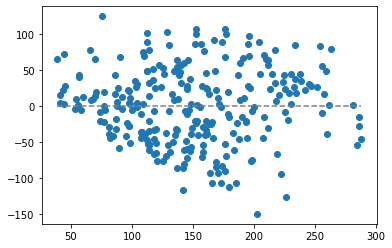

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pred_train, y_train - pred_train)
plt.plot([pred_train.min(), pred_train.max()], [0, 0], '--', color='grey')